In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS
from sklearn.tree import (DecisionTreeClassifier as DTC,
DecisionTreeRegressor as DTR,
plot_tree,
export_text)
from sklearn.metrics import (accuracy_score,
log_loss)
from sklearn.ensemble import \
(RandomForestRegressor as RF,
GradientBoostingRegressor as GBR,
GradientBoostingClassifier as GBC)
from ISLP.bart import BART
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.cluster import \
(KMeans,
AgglomerativeClustering)
from scipy.cluster.hierarchy import \
(dendrogram,
cut_tree)
from ISLP.cluster import compute_linkage
import xgboost as xgb
from catboost import CatBoostClassifier, CatBoostRegressor
from ISLP import load_data, confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
from scipy import stats
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm

# Exploratory Data Analysis(EDA 1)

### SBP and DBP for Sex

In [2]:
data = pd.read_csv("503data.csv")
## We first drop the SEQN 
data = data.drop(columns = ['SEQN'])

In [3]:
data

RIAGENDR  RIDAGEYR  DSD010  DSDCOUNT  BMXBMI  ALQ130  SMQ020  INDFMMPI  \
0            2        29       2         0    37.8       1       2      5.00   
1            1        68       1         1    30.2       2       2      1.20   
2            1        58       1         2    30.5       6       2      1.81   
3            1        55       2         0    20.9       1       2      5.00   
4            2        48       1         3    23.9       1       2      4.89   
...        ...       ...     ...       ...     ...     ...     ...       ...   
4392         1        64       2         0    37.5       2       1      1.15   
4393         1        52       2         0    29.5       1       1      1.48   
4394         2        67       1         2    37.9       2       2      1.82   
4395         1        40       1         1    38.2       2       2      3.82   
4396         1        63       1         1    25.5       5       2      4.45   

          BPXOSY     BPXODI  
0      99.000000  54.333333  
1     134.000000  70.000000  
2     138.000000  97.000000  
3     119.666667  75.000000  
4     104.000000  62.333333  
...          ...        ...  
4392  138.666667  86.666667  
4393  140.000000  86.666667  
4394  112.000000  67.333333  
4395  103.000000  67.333333  
4396  124.000000  66.666667  

[4397 rows x 10 columns]

In [4]:
# Find the dimension of data
print("The number of observations is :", np.shape(data)[0])

The number of observations is : 4397


In [5]:
# Find the number of male and female in our data set
print("Number of male is:", np.shape(data[data["RIAGENDR"] == 1])[0],"\n"
      "Number of female is:", np.shape(data[data["RIAGENDR"] == 2])[0])

Number of male is: 2239 
Number of female is: 2158


Thus, we have totally 2239 males and 2158 females in our data set. 

We may now want to explore what is the distribution of BPXOSY and BPXODI between male and female two see if there is any pattern between sex

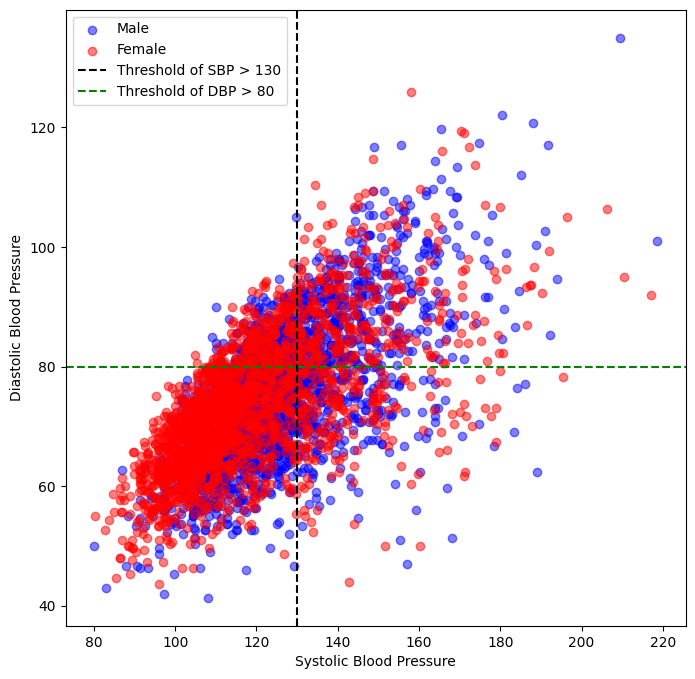

In [6]:
data_male = data[data["RIAGENDR"] == 1]
data_female = data[data["RIAGENDR"] == 2]

fig, ax = plt.subplots(figsize = (8, 8))
plt.scatter(data_male["BPXOSY"], data_male["BPXODI"], facecolor = "blue", label = "Male", alpha = 0.5)
plt.scatter(data_female["BPXOSY"], data_female["BPXODI"], facecolor = "red", label = "Female", alpha = 0.5)
plt.xlabel("Systolic Blood Pressure")
plt.ylabel("Diastolic Blood Pressure")
plt.axvline(x = 130, color = "black", linestyle = '--', label = "Threshold of SBP > 130")
plt.axhline(y = 80, color = 'green', linestyle = '--', label = "Threshold of DBP > 80")
plt.legend()
_ = plt.show()

In [7]:
print("Mean of SBP for male:", np.mean(data_male["BPXOSY"]),"\n"
        "Mean of SBP for female:", np.mean(data_female["BPXOSY"]))

Mean of SBP for male: 125.9507220485336 
Mean of SBP for female: 119.06765523632994


In [8]:
print("Sd of SBP for male:", np.std(data_male["BPXOSY"]),"\n"
        "Sd of SBP for female:", np.std(data_female["BPXOSY"]))

Sd of SBP for male: 16.607162001233387 
Sd of SBP for female: 19.08474602104655


We can now present two sample t-test to find if different sex have same average SBP and DBP

In [9]:
t_stats_sbp, p_value_sbp = stats.ttest_ind(data_male["BPXOSY"], 
                                           data_female["BPXOSY"], equal_var = False)
print("t-stats for SBP:", t_stats_sbp, "\n""p-value for SBP:", p_value_sbp)

t-stats for SBP: 12.735670781368935 
p-value for SBP: 1.717464949617433e-36


Thus,we will reject the null hypothesis that male and female have same SBP under unknown variance. We do the same thing for DBP

In [10]:
print("Mean of DBP for male:", np.mean(data_male["BPXODI"]),"\n"
        "Mean of DBP for female:", np.mean(data_female["BPXODI"]))

Mean of DBP for male: 75.7988685425041 
Mean of DBP for female: 73.50880444856348


In [11]:
print("Sd of DBP for male:", np.std(data_male["BPXODI"]),"\n"
        "Sd of DBP for female:", np.std(data_female["BPXODI"]))

Sd of DBP for male: 11.56993183317537 
Sd of DBP for female: 11.306638668298168


In [12]:
t_stats_dbp, p_value_dbp = stats.ttest_ind(data_male["BPXODI"], 
                                           data_female["BPXODI"], equal_var = False)
print("t-stats for DBP:", t_stats_dbp, "\n""p-value for SBP:", p_value_dbp)

t-stats for DBP: 6.63629609185746 
p-value for SBP: 3.607051064287284e-11


Thus, we also reject the null hypothesis that male and female have same DPB under unknown variance.

### BMI 

In [13]:
print("Mean of BMI:", np.mean(data["BMXBMI"]),"\n" 
      "Sd of BMI:", np.std(data["BMXBMI"]),"\n"
      "Max of BMI:", np.max(data["BMXBMI"]),"\n"
      "Min of BMI:", np.min(data["BMXBMI"]))

Mean of BMI: 29.996179213099836 
Sd of BMI: 7.568143554660437 
Max of BMI: 80.6 
Min of BMI: 14.6


compute basic statistics of BMI for male and female

Male

In [14]:
print("Mean of BMI:", np.mean(data_male["BMXBMI"]), "\n"
      "Sd of BMI:", np.std(data_male["BMXBMI"]),"\n"
      "Max of BMI:", np.max(data_male["BMXBMI"]),"\n"
      "Min of BMI:", np.min(data_male["BMXBMI"]))

Mean of BMI: 29.394953104064317 
Sd of BMI: 6.413652009517309 
Max of BMI: 68.2 
Min of BMI: 14.9


Female

In [15]:
print("Mean of BMI:", np.mean(data_female["BMXBMI"]), "\n"
      "Sd of BMI:", np.std(data_female["BMXBMI"]),"\n"
      "Max of BMI:", np.max(data_female["BMXBMI"]),"\n"
      "Min of BMI:", np.min(data_female["BMXBMI"]))

Mean of BMI: 30.61997219647822 
Sd of BMI: 8.55922801681892 
Max of BMI: 80.6 
Min of BMI: 14.6


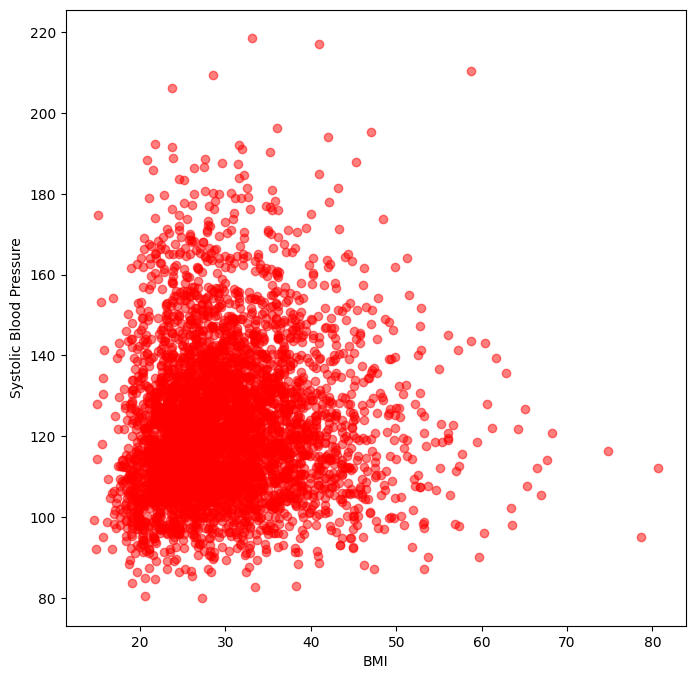

In [16]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.scatter(data["BMXBMI"], data["BPXOSY"], facecolor = 'red', alpha = 0.5)
plt.xlabel("BMI")
plt.ylabel("Systolic Blood Pressure")
_ = plt.show()

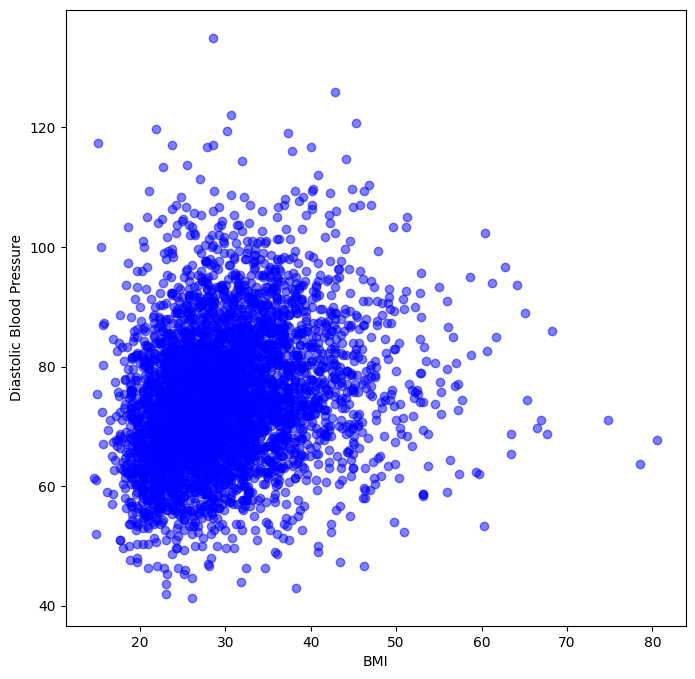

In [17]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.scatter(data["BMXBMI"], data["BPXODI"], facecolor = 'blue', alpha = 0.5)
plt.xlabel("BMI")
plt.ylabel("Diastolic Blood Pressure")
_ = plt.show()

### Family monthly poverty level index

In [18]:
print("Mean of INDFMMPI:", np.mean(data["INDFMMPI"]), "\n"
      "Sd of INDFMMPI:", np.std(data["INDFMMPI"]),"\n"
      "Max of INDFMMPI:", np.max(data["INDFMMPI"]),"\n"
      "Min of INDFMMPI:", np.min(data["INDFMMPI"]))

Mean of INDFMMPI: 2.51424835114851 
Sd of INDFMMPI: 1.5970464296130777 
Max of INDFMMPI: 5.0 
Min of INDFMMPI: 0.0


Male

In [19]:
print("Mean of INDFMMPI:", np.mean(data_male["INDFMMPI"]), "\n"
      "Sd of INDFMMPI:", np.std(data_male["INDFMMPI"]),"\n"
      "Max of INDFMMPI:", np.max(data_male["INDFMMPI"]),"\n"
      "Min of INDFMMPI:", np.min(data_male["INDFMMPI"]))

Mean of INDFMMPI: 2.5764046449307725 
Sd of INDFMMPI: 1.6087650935186382 
Max of INDFMMPI: 5.0 
Min of INDFMMPI: 0.0


In [20]:
print("Mean of INDFMMPI:", np.mean(data_female["INDFMMPI"]), "\n"
      "Sd of INDFMMPI:", np.std(data_female["INDFMMPI"]),"\n"
      "Max of INDFMMPI:", np.max(data_female["INDFMMPI"]),"\n"
      "Min of INDFMMPI:", np.min(data_female["INDFMMPI"]))

Mean of INDFMMPI: 2.4497590361445782 
Sd of INDFMMPI: 1.5822174574967904 
Max of INDFMMPI: 5.0 
Min of INDFMMPI: 0.0


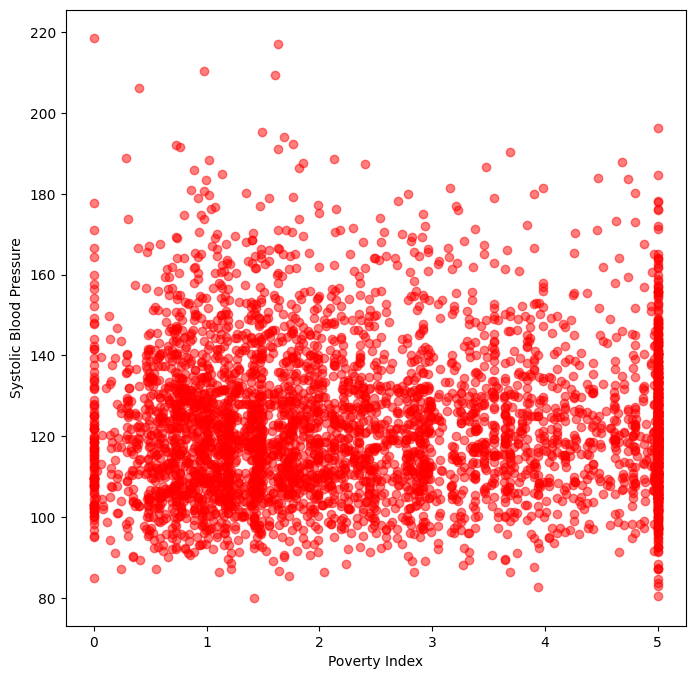

In [21]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.scatter(data["INDFMMPI"], data["BPXOSY"], facecolor = 'red', alpha = 0.5)
plt.xlabel("Poverty Index")
plt.ylabel("Systolic Blood Pressure")
_ = plt.show()

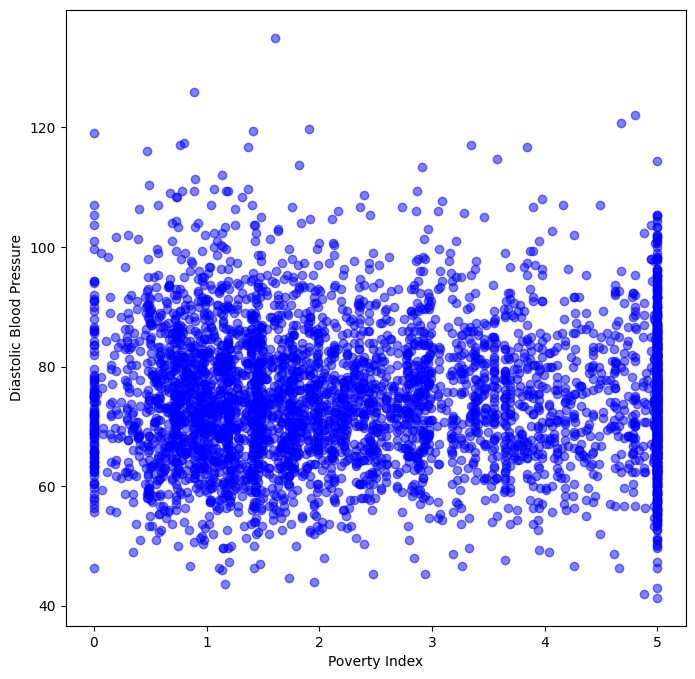

In [22]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.scatter(data["INDFMMPI"], data["BPXODI"], facecolor = 'blue', alpha = 0.5)
plt.xlabel("Poverty Index")
plt.ylabel("Diastolic Blood Pressure")
_ = plt.show()

We now want to find the correlation matrix between continuous variables

In [23]:
selected_columns = ["BPXOSY", "BPXODI", "RIDAGEYR", "BMXBMI", "INDFMMPI"]
correlation_matrix = data[selected_columns].corr()
print(correlation_matrix)

            BPXOSY    BPXODI  RIDAGEYR    BMXBMI  INDFMMPI
BPXOSY    1.000000  0.652238  0.445452  0.062470 -0.005474
BPXODI    0.652238  1.000000  0.090629  0.232648 -0.019861
RIDAGEYR  0.445452  0.090629  1.000000  0.045217  0.141366
BMXBMI    0.062470  0.232648  0.045217  1.000000 -0.048060
INDFMMPI -0.005474 -0.019861  0.141366 -0.048060  1.000000


We can now try to find blood pressure difference between people who smoke more than 100 and less than 100

In [24]:
data_smoke_1 = data[data["SMQ020"] == 1]
data_smoke_2 = data[data["SMQ020"] == 2]

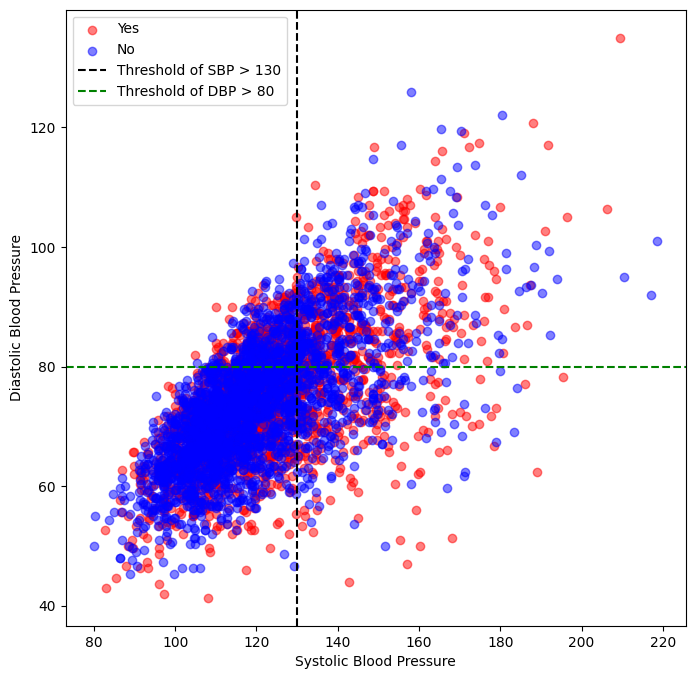

In [25]:
ax, fig = plt.subplots(figsize = (8, 8))
plt.scatter(data_smoke_1["BPXOSY"], data_smoke_1["BPXODI"], 
            facecolor = 'red', alpha = 0.5, label = "Yes")
plt.scatter(data_smoke_2["BPXOSY"], data_smoke_2["BPXODI"], 
            facecolor = 'blue', alpha = 0.5, label = "No")
plt.xlabel("Systolic Blood Pressure")
plt.ylabel("Diastolic Blood Pressure")
plt.axvline(x = 130, color = "black", linestyle = '--', label = "Threshold of SBP > 130")
plt.axhline(y = 80, color = 'green', linestyle = '--', label = "Threshold of DBP > 80")
plt.legend()
_ = plt.show()

In [26]:
t_stats_smoke_sy, p_value_smoke_sy = stats.ttest_ind(data_smoke_1["BPXOSY"], 
                                           data_smoke_2["BPXOSY"], equal_var = False)
print("t-stats for SBP:", t_stats_smoke_sy, "\n" "p-value for SBP:", p_value_smoke_sy)

t-stats for SBP: 7.779689931918986 
p-value for SBP: 9.171859588224484e-15


In [27]:
t_stats_smoke_di, p_value_smoke_di = stats.ttest_ind(data_smoke_1["BPXODI"], 
                                           data_smoke_2["BPXODI"], equal_var = False)
print("t-stats for SBP:", t_stats_smoke_di, "\n" "p-value for SBP:", p_value_smoke_di)

t-stats for SBP: 4.388765486844361 
p-value for SBP: 1.1693289941953287e-05


# Create Dummy Variable that is Non-Hypertension or Hypertension, TEST(EDA 2)

In [28]:
hyper = np.zeros((np.shape(data)[0], 1))
for i in range(np.shape(data)[0]):
    if data["BPXOSY"][i] >= 130 or data["BPXODI"][i] >= 80:
        hyper[i] = 1
    else:
        hyper[i] = 0

In [29]:
data["HYPER"] = hyper

/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


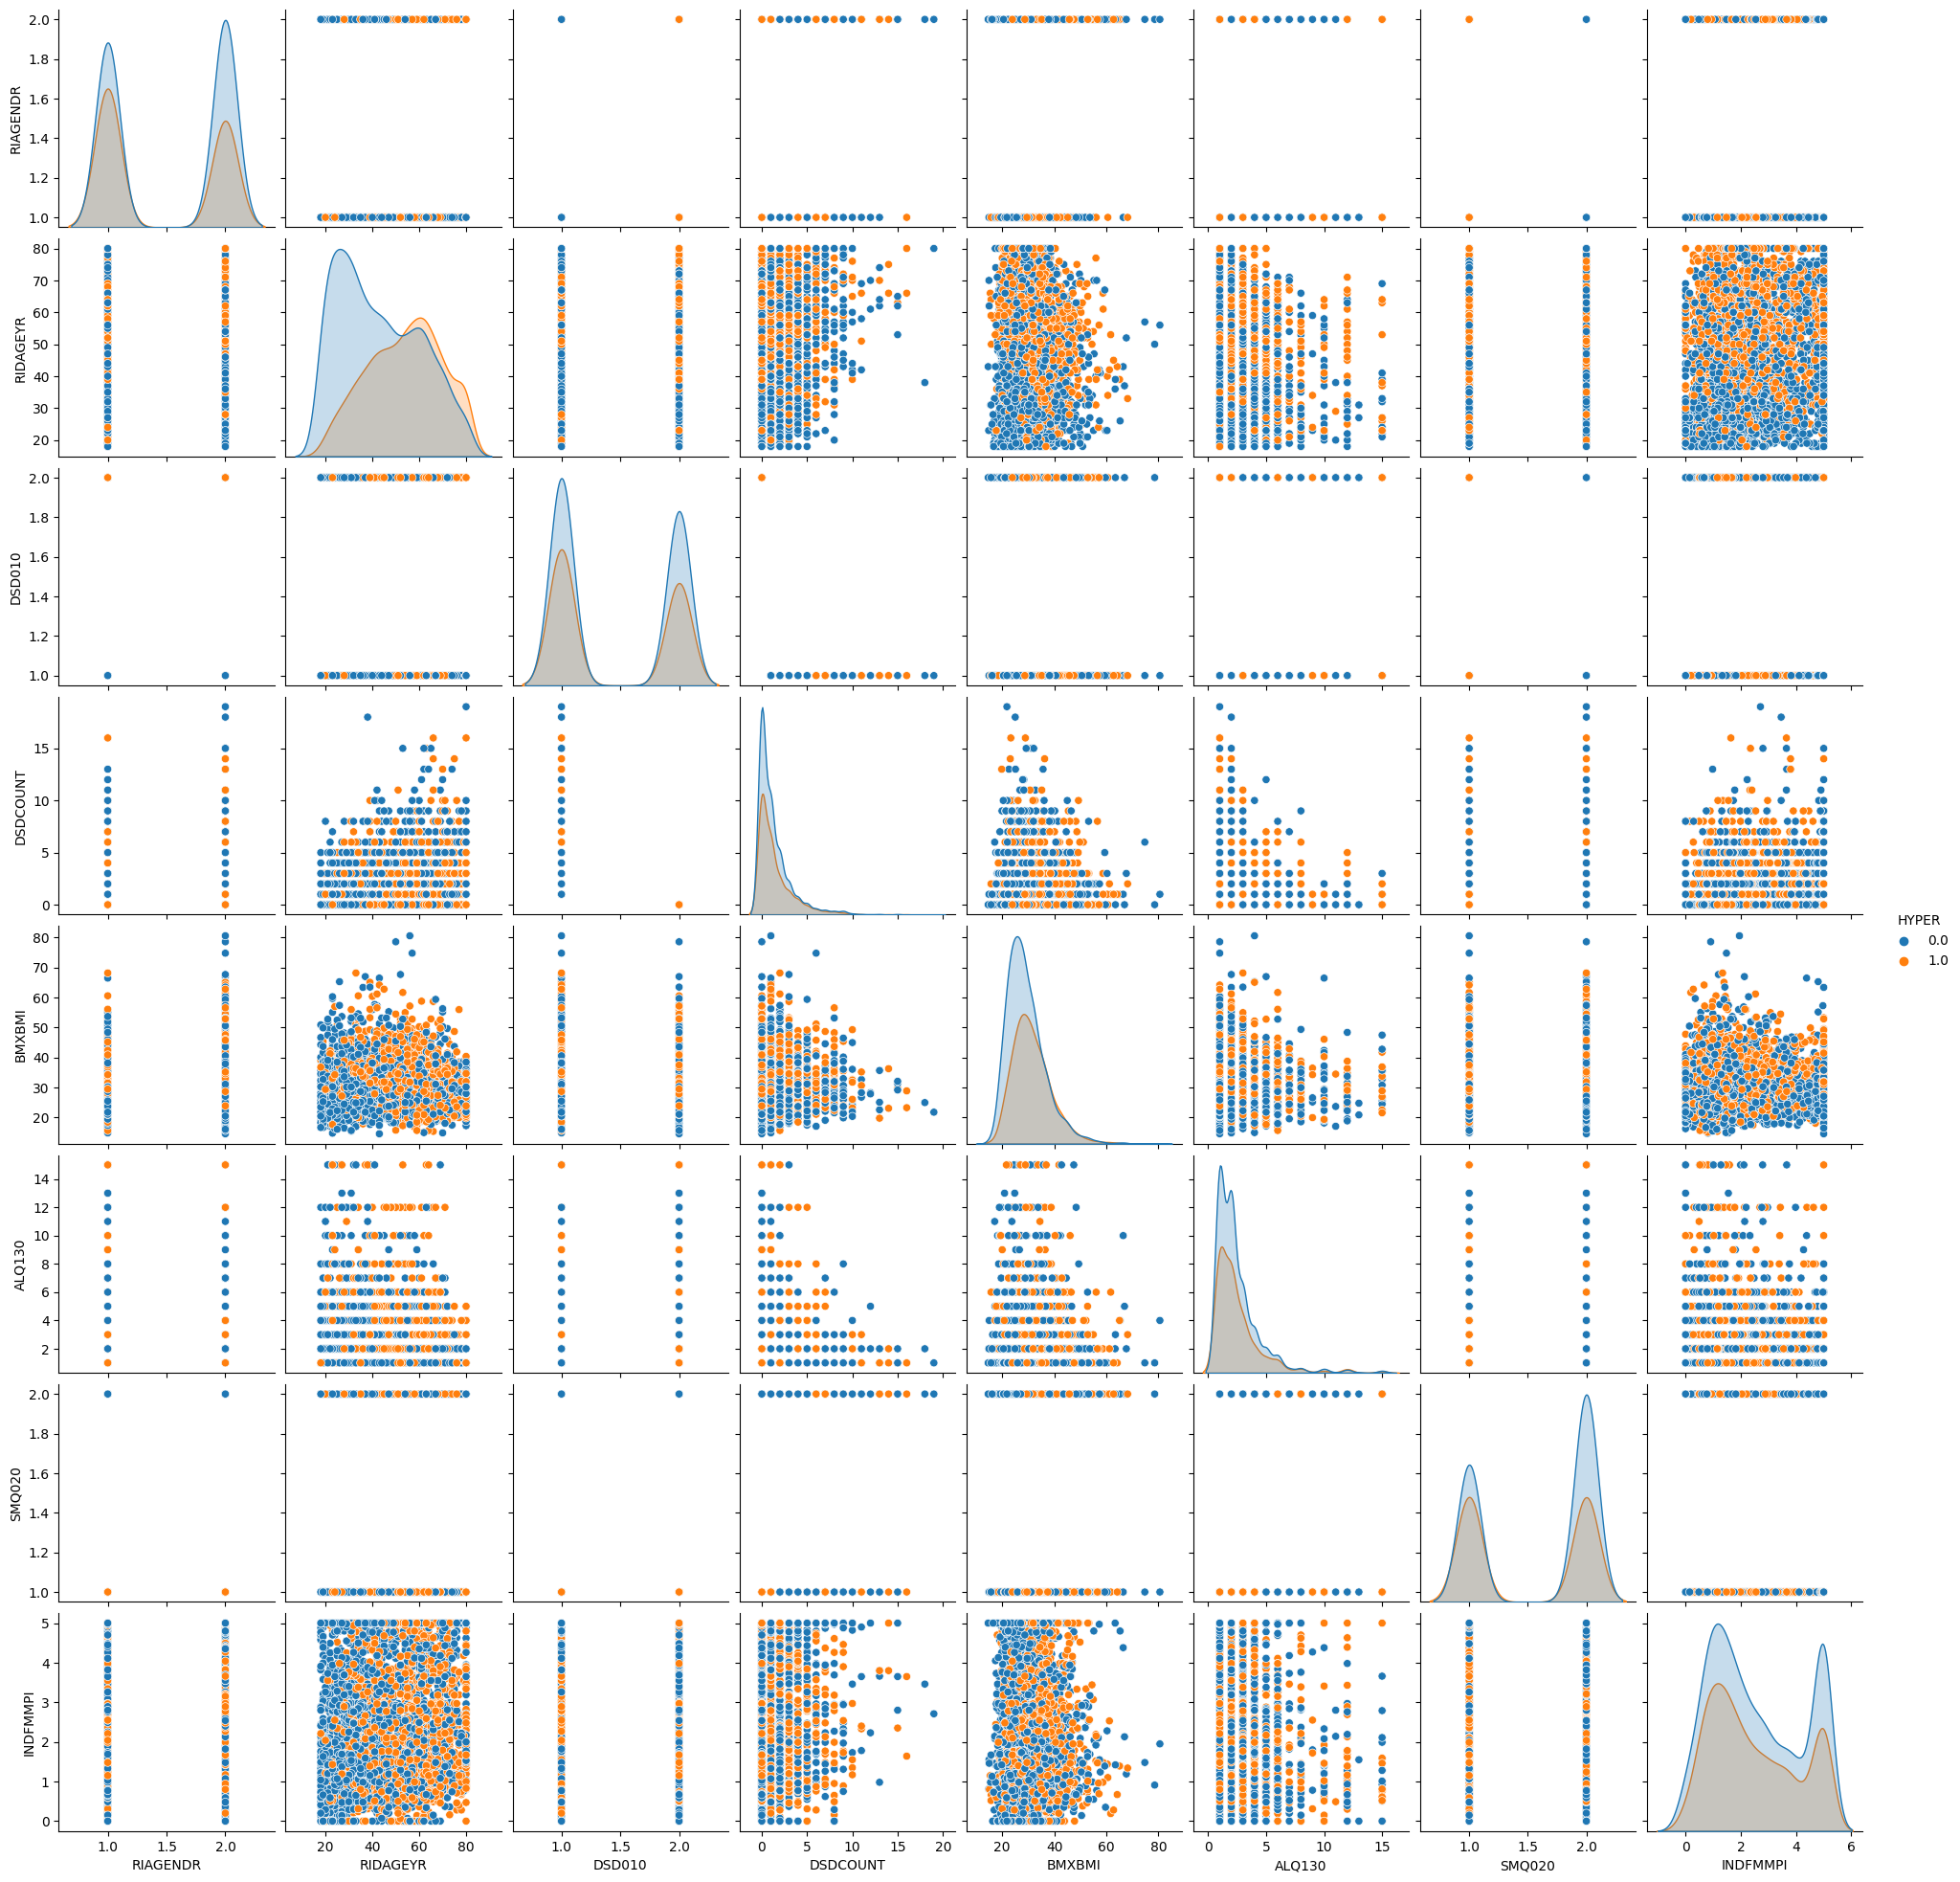

In [30]:
_ = sns.pairplot(data[['RIAGENDR', 'RIDAGEYR', 'DSD010', 'DSDCOUNT', 'BMXBMI', 'ALQ130', 'SMQ020', 
                   'INDFMMPI', 'HYPER']], hue = 'HYPER')

### Split our data into hyper = 1 and hyper = 0 to do furthur expolatory data analysis

In [31]:
data_hyper0 = data[data["HYPER"] == 0]
data_hyper1 = data[data["HYPER"] == 1]

In [32]:
### Do the two sample t-test to check if mean of BMI for two populations are the same under unknown variance
t_stat_bmi, p_value_bmi = stats.ttest_ind(data_hyper0["BMXBMI"],
                                          data_hyper1["BMXBMI"], equal_var=False)
print("t_stat for bmi between two groups:", t_stat_bmi,"\n"
      "p-values for bmi between two groups", p_value_bmi)

t_stat for bmi between two groups: -9.848230063863216 
p-values for bmi between two groups 1.2967877263063812e-22


In [33]:
### Do the two sample t-test to check if mean of age for two populations are the same under unknown variance
t_stat_age, p_value_age = stats.ttest_ind(data_hyper0["RIDAGEYR"],
                                          data_hyper1["RIDAGEYR"], equal_var = False)
print("t_stat for age between two groups:", t_stat_age,"\n"
      "p-values for age between two groups", p_value_age)

t_stat for age between two groups: -21.695785132353773 
p-values for age between two groups 8.128241613186986e-99


In [34]:
### Do the two sample t-test to check if mean of alcohol use for two populations are the same under unknown variance
t_stat_alco, p_value_alco = stats.ttest_ind(data_hyper0["ALQ130"],
                                          data_hyper1["ALQ130"], equal_var = False)
print("t_stat for alcohol use between two groups:", t_stat_alco,"\n"
      "p-values for alcohol use between two groups", p_value_alco)

t_stat for alcohol use between two groups: -1.6021042652311799 
p-values for alcohol use between two groups 0.10922174289866082


In [35]:
### Do the two sample t-test to check if mean of poverty index use for two populations are the same under unknown variance
t_stat_pover, p_value_pover = stats.ttest_ind(data_hyper0["INDFMMPI"],
                                          data_hyper1["INDFMMPI"], equal_var = False)
print("t_stat for poverty index between two groups:", t_stat_pover,"\n"
      "p-values for poverty index between two groups", p_value_pover)

t_stat for poverty index between two groups: 1.7355608042969533 
p-values for poverty index between two groups 0.08272056346358136


### Proportion test for categorical variables 
#### Gender

In [36]:
### Now do proportional_ztest for categorical variables
count_male_0 = np.shape(data_hyper0[data_hyper0["RIAGENDR"] == 1])[0]
count_female_0 = np.shape(data_hyper0[data_hyper0["RIAGENDR"] == 2])[0]

count_male = np.shape(data_male)[0]
count_female = np.shape(data_female)[0]

print("number of male with hyper = 0:", count_male_0, "\n""number of female with hyper = 0:", count_female_0,
      "\n""Total number of male:", count_male, "\n""Total number of female:", count_female, "\n")

### Perform proportion test
stat_gender, pval_gender = proportions_ztest([count_male_0, count_female_0],
                                             [count_male, count_female])
print("stat : ", stat_gender, "\n""p-value for gender:", pval_gender)

number of male with hyper = 0: 1239 
number of female with hyper = 0: 1390 
Total number of male: 2239 
Total number of female: 2158 

stat :  -6.134895024477094 
p-value for gender: 8.521544529784751e-10


#### DSD010

In [37]:
### Now do proportional_ztest for categorical variables
count_DSD1_0 = np.shape(data_hyper0[data_hyper0["DSD010"] == 1])[0]
count_DSD2_0 = np.shape(data_hyper0[data_hyper0["DSD010"] == 2])[0]

count_DSD1 = np.shape(data[data["DSD010"] == 1])[0]
count_DSD2 = np.shape(data[data["DSD010"] == 2])[0]

print("number of taken DS with hyper = 0:", count_DSD1_0, "\n""number of not taken DS with hyper = 0:", count_DSD2_0,
      "\n""Total number of taken DS:", count_DSD1, "\n""Total number of not taken DS:", count_DSD2, "\n")

### Perform proportion test
stat_DSD, pval_DSD = proportions_ztest([count_DSD1_0, count_DSD2_0],
                                             [count_DSD1, count_DSD2])
print("stat : ", stat_DSD, "\n""p-value for DSD:", pval_DSD)

number of taken DS with hyper = 0: 1428 
number of not taken DS with hyper = 0: 1201 
Total number of taken DS: 2437 
Total number of not taken DS: 1960 

stat :  -1.8007360476207708 
p-value for DSD: 0.07174449304052656


#### SMQ020


In [38]:
count_SMQ1_0 = np.shape(data_hyper0[data_hyper0["SMQ020"] == 1])[0]
count_SMQ2_0 = np.shape(data_hyper0[data_hyper0["SMQ020"] == 2])[0]

count_SMQ1 = np.shape(data[data["SMQ020"] == 1])[0]
count_SMQ2 = np.shape(data[data["SMQ020"] == 2])[0]

print("number of smoke > 100 with hyper = 0:", count_SMQ1_0, "\n""number of smoke < 100 with hyper = 0:", count_SMQ2_0,
      "\n""Total number of people smoke > 100:", count_SMQ1, "\n""Total number of people smoke < 100:", count_SMQ2, "\n")

### Perform proportion test
stat_SMQ, pval_SMQ = proportions_ztest([count_SMQ1_0, count_SMQ2_0],
                                             [count_SMQ1, count_SMQ2])
print("stat : ", stat_SMQ, "\n""p-value for DSD:", pval_SMQ)

number of smoke > 100 with hyper = 0: 1047 
number of smoke < 100 with hyper = 0: 1582 
Total number of people smoke > 100: 1932 
Total number of people smoke < 100: 2465 

stat :  -6.702600335327746 
p-value for DSD: 2.0474289572808595e-11


In [39]:
test_result_continuous ={
    'Variable':['BMI', 'Age', 'Alcohol use', 'poverty index'], 
    't_stat' :[t_stat_bmi, t_stat_age, t_stat_alco, t_stat_pover],
    'p_value':[p_value_bmi, p_value_age, p_value_alco, p_value_pover]
}

test_result_continuous = pd.DataFrame(test_result_continuous)
test_result_continuous

Variable     t_stat       p_value
0            BMI  -9.848230  1.296788e-22
1            Age -21.695785  8.128242e-99
2    Alcohol use  -1.602104  1.092217e-01
3  poverty index   1.735561  8.272056e-02

In [40]:
test_result_categorical ={
    'Variable':['Gender', 'Dietary Supplement Taken', 'Smoke'], 
    'stat' :[stat_gender, stat_DSD, stat_SMQ],
    'p_value':[pval_gender, pval_DSD, pval_SMQ]
}

test_result_categorical = pd.DataFrame(test_result_categorical)
test_result_categorical

Variable      stat       p_value
0                    Gender -6.134895  8.521545e-10
1  Dietary Supplement Taken -1.800736  7.174449e-02
2                     Smoke -6.702600  2.047429e-11

# Regression for Finding Association (EDA 3)

In [41]:
from sklearn import metrics
import sklearn.model_selection
import sklearn.linear_model
import sklearn.metrics
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

### Categorical Variable transformation

In [42]:
gender_mapping = {1: 1, 2: 0} ## 0 represent female and 1 represent male
data['RIAGENDR'] = data['RIAGENDR'].replace(gender_mapping)

DSD_mapping = {1:1, 2:0} ## 0 represent not taken Dietary supplement, 1 represent taken
data['DSD010'] = data['DSD010'].replace(DSD_mapping)

SMQ_mapping = {1:1, 2:0} ## 0 represent smoke < 100, 1 represent smoke >= 100
data['SMQ020'] = data['SMQ020'].replace(SMQ_mapping)

data

RIAGENDR  RIDAGEYR  DSD010  DSDCOUNT  BMXBMI  ALQ130  SMQ020  INDFMMPI  \
0            0        29       0         0    37.8       1       0      5.00   
1            1        68       1         1    30.2       2       0      1.20   
2            1        58       1         2    30.5       6       0      1.81   
3            1        55       0         0    20.9       1       0      5.00   
4            0        48       1         3    23.9       1       0      4.89   
...        ...       ...     ...       ...     ...     ...     ...       ...   
4392         1        64       0         0    37.5       2       1      1.15   
4393         1        52       0         0    29.5       1       1      1.48   
4394         0        67       1         2    37.9       2       0      1.82   
4395         1        40       1         1    38.2       2       0      3.82   
4396         1        63       1         1    25.5       5       0      4.45   

          BPXOSY     BPXODI  HYPER  
0      99.000000  54.333333    0.0  
1     134.000000  70.000000    1.0  
2     138.000000  97.000000    1.0  
3     119.666667  75.000000    0.0  
4     104.000000  62.333333    0.0  
...          ...        ...    ...  
4392  138.666667  86.666667    1.0  
4393  140.000000  86.666667    1.0  
4394  112.000000  67.333333    0.0  
4395  103.000000  67.333333    0.0  
4396  124.000000  66.666667    0.0  

[4397 rows x 11 columns]

Now we want to do logistic regression, so we will create a new dataset that drop BPXOSY and BPXODI and then to make classification prediction, and get associasions

In [43]:
data_class = data.drop(columns= ["BPXOSY", "BPXODI"])
hyper = data_class["HYPER"]
data_class = data_class.drop(columns = "HYPER")
data_class

RIAGENDR  RIDAGEYR  DSD010  DSDCOUNT  BMXBMI  ALQ130  SMQ020  INDFMMPI
0            0        29       0         0    37.8       1       0      5.00
1            1        68       1         1    30.2       2       0      1.20
2            1        58       1         2    30.5       6       0      1.81
3            1        55       0         0    20.9       1       0      5.00
4            0        48       1         3    23.9       1       0      4.89
...        ...       ...     ...       ...     ...     ...     ...       ...
4392         1        64       0         0    37.5       2       1      1.15
4393         1        52       0         0    29.5       1       1      1.48
4394         0        67       1         2    37.9       2       0      1.82
4395         1        40       1         1    38.2       2       0      3.82
4396         1        63       1         1    25.5       5       0      4.45

[4397 rows x 8 columns]

In [44]:
model = MS(data_class, intercept = False)
D = model.fit_transform(data_class)
feature_names = list(D.columns)

In [45]:
(data_class_train,
 data_class_test,
 hyper_train,
 hyper_test) = skm.train_test_split(D,
                                hyper,
                                test_size = 0.2,
                                random_state = 0)

In [46]:
model_logistic = LogisticRegression(max_iter = 1000)
model_logistic.fit(data_class_train, hyper_train)

LogisticRegression(max_iter=1000)

In [47]:
coef_logistic = model_logistic.coef_
coef_logistic

array([[ 0.31391718,  0.04108676, -0.16315201, -0.01758555,  0.03778596,
         0.06404908,  0.05087686, -0.07487865]])

In [48]:
model_logistic_1 = sm.GLM(hyper_train, data_class_train, family = sm.families.Binomial())
results = model_logistic_1.fit()
summary = results.summary()
print(summary)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  HYPER   No. Observations:                 3517
Model:                            GLM   Df Residuals:                     3509
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2298.8
Date:                Sat, 20 Apr 2024   Deviance:                       4597.5
Time:                        17:22:44   Pearson chi2:                 3.53e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03897
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RIAGENDR       0.1190      0.073      1.622      0.1

In [49]:
test_result_class = model_logistic.predict(data_class_test)
test_result_class

prediction_accuracy = np.mean(test_result_class == hyper_test)
prediction_accuracy

0.6488636363636363

### Linear Regression

In [50]:
data_reg = data.drop(columns= "HYPER")
BPXOSY_reg = data_reg["BPXOSY"]
BPXODI_reg = data_reg["BPXODI"]
data_reg = data_reg.drop(columns = ["BPXOSY", "BPXODI"])
data_reg

RIAGENDR  RIDAGEYR  DSD010  DSDCOUNT  BMXBMI  ALQ130  SMQ020  INDFMMPI
0            0        29       0         0    37.8       1       0      5.00
1            1        68       1         1    30.2       2       0      1.20
2            1        58       1         2    30.5       6       0      1.81
3            1        55       0         0    20.9       1       0      5.00
4            0        48       1         3    23.9       1       0      4.89
...        ...       ...     ...       ...     ...     ...     ...       ...
4392         1        64       0         0    37.5       2       1      1.15
4393         1        52       0         0    29.5       1       1      1.48
4394         0        67       1         2    37.9       2       0      1.82
4395         1        40       1         1    38.2       2       0      3.82
4396         1        63       1         1    25.5       5       0      4.45

[4397 rows x 8 columns]

In [51]:
model_reg_OSY = sm.OLS(BPXOSY_reg, data_reg)
result_reg_OSY = model_reg_OSY.fit()
result_reg_OSY.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 BPXOSY   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                          1.468e+04
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:22:44   Log-Likelihood:                         -20124.
No. Observations:                4397   AIC:                                  4.026e+04
Df Residuals:                    4389   BIC:                                  4.032e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RIAGENDR      10.3671      0.740     14.004      0.000       8.916      11.818
RIDAGEYR       0.9464      0.021     45.895      0.000       0.906       0.987
DSD010         3.1150      0.911      3.420      0.001       1.329       4.900
DSDCOUNT      -0.8915      0.225     -3.957      0.000      -1.333      -0.450
BMXBMI         1.7954      0.033     55.214      0.000       1.732       1.859
ALQ130         3.3882      0.179     18.941      0.000       3.038       3.739
SMQ020         0.1986      0.762      0.261      0.794      -1.296       1.693
INDFMMPI       2.6158      0.223     11.721      0.000       2.178       3.053
==============================================================================
Omnibus:                       62.339   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.197
Skew:                          -0.236   Prob(JB):                     2.10e-16
Kurtosis:                       3.413   Cond. No.                         151.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
model_reg_ODI = sm.OLS(BPXODI_reg, data_reg)
result_reg_ODI = model_reg_ODI.fit()
result_reg_ODI.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 BPXODI   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          1.255e+04
Date:                Sat, 20 Apr 2024   Prob (F-statistic):                        0.00
Time:                        17:22:44   Log-Likelihood:                         -18280.
No. Observations:                4397   AIC:                                  3.658e+04
Df Residuals:                    4389   BIC:                                  3.663e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RIAGENDR       5.0424      0.487     10.360      0.000       4.088       5.997
RIDAGEYR       0.3555      0.014     26.219      0.000       0.329       0.382
DSD010         2.1692      0.599      3.622      0.000       0.995       3.343
DSDCOUNT      -0.6892      0.148     -4.653      0.000      -0.980      -0.399
BMXBMI         1.4032      0.021     65.633      0.000       1.361       1.445
ALQ130         2.1987      0.118     18.694      0.000       1.968       2.429
SMQ020         0.8370      0.501      1.670      0.095      -0.145       1.819
INDFMMPI       2.0487      0.147     13.962      0.000       1.761       2.336
==============================================================================
Omnibus:                      163.047   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.423
Skew:                          -0.334   Prob(JB):                     2.82e-57
Kurtosis:                       3.987   Cond. No.                         151.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Classification

# Regression

## Tree

### Single Tree

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from pygam import LinearGAM, s, f

In [54]:
# split into train and test datasets
data_train, data_test = train_test_split(data, test_size = 0.2, random_state = 6789, stratify = data[["HYPER"]])

# extract train/test X and y
X_train = data_train.drop(["BPXOSY","BPXODI","HYPER"], axis = 1)
y_train_h = data_train.BPXOSY
y_train_l = data_train.BPXODI
X_test = data_test.drop(["BPXOSY","BPXODI","HYPER"], axis = 1)
y_test_h = data_test.BPXOSY
y_test_l = data_test.BPXODI

#### Regression for BPXOSY

In [55]:
# select max_leaf_nodes by cross_validation
leaves = np.arange(2,31,1)
cv = KFold(n_splits = 5, random_state = 42, shuffle = True) # here choose fold = 5

for leaf in leaves:
    tree1 = DecisionTreeRegressor(random_state = 0, max_leaf_nodes = leaf)
    results = pd.DataFrame(cross_validate(tree1,X_train,y_train_h,cv=cv,scoring='neg_mean_squared_error'))
    print(f"max_leaf_nodes = {leaf}, average MSE = {-results.test_score.mean()}")

max_leaf_nodes = 2, average MSE = 277.6452244537625
max_leaf_nodes = 3, average MSE = 263.72986907807115
max_leaf_nodes = 4, average MSE = 256.5050112784838
max_leaf_nodes = 5, average MSE = 251.8571373765263
max_leaf_nodes = 6, average MSE = 249.0797655709197
max_leaf_nodes = 7, average MSE = 247.9716663240428
max_leaf_nodes = 8, average MSE = 251.4170416669715
max_leaf_nodes = 9, average MSE = 251.98072712295988
max_leaf_nodes = 10, average MSE = 252.3740681059338
max_leaf_nodes = 11, average MSE = 253.50309389068556
max_leaf_nodes = 12, average MSE = 253.60872441136144
max_leaf_nodes = 13, average MSE = 254.8252675679866
max_leaf_nodes = 14, average MSE = 254.52491065276317
max_leaf_nodes = 15, average MSE = 255.33168968234708
max_leaf_nodes = 16, average MSE = 256.8980528419277
max_leaf_nodes = 17, average MSE = 257.4326517749423
max_leaf_nodes = 18, average MSE = 258.1733223123883
max_leaf_nodes = 19, average MSE = 258.3616050667342
max_leaf_nodes = 20, average MSE = 259.504330864

From results above, we choose max_leaf_nodes = 7 which has minimum average MSE.

#### Regression for BPXODI

In [56]:
# select max_leaf_nodes by cross_validation
for leaf in leaves:
    tree2 = DecisionTreeRegressor(random_state = 0, max_leaf_nodes = leaf)
    results = pd.DataFrame(cross_validate(tree2,X_train,y_train_l,cv=cv,scoring='neg_mean_squared_error'))
    print(f"max_leaf_nodes = {leaf}, average MSE = {-results.test_score.mean()}")

max_leaf_nodes = 2, average MSE = 127.69226462091221
max_leaf_nodes = 3, average MSE = 122.59172635824022
max_leaf_nodes = 4, average MSE = 120.0977211262959
max_leaf_nodes = 5, average MSE = 118.79795664222779
max_leaf_nodes = 6, average MSE = 117.41048714882793
max_leaf_nodes = 7, average MSE = 116.95464027076787
max_leaf_nodes = 8, average MSE = 117.01678233415839
max_leaf_nodes = 9, average MSE = 116.47811442945776
max_leaf_nodes = 10, average MSE = 116.77714829840875
max_leaf_nodes = 11, average MSE = 117.02479176556646
max_leaf_nodes = 12, average MSE = 117.53339016276122
max_leaf_nodes = 13, average MSE = 117.57872131671999
max_leaf_nodes = 14, average MSE = 117.47308727849482
max_leaf_nodes = 15, average MSE = 117.44132678223316
max_leaf_nodes = 16, average MSE = 117.22829903753787
max_leaf_nodes = 17, average MSE = 117.21711680599351
max_leaf_nodes = 18, average MSE = 117.05820094115555
max_leaf_nodes = 19, average MSE = 117.08336739693968
max_leaf_nodes = 20, average MSE = 11

From results above, we choose max_leaf_nodes = 9 which has minimum average MSE.

#### Fitting Results

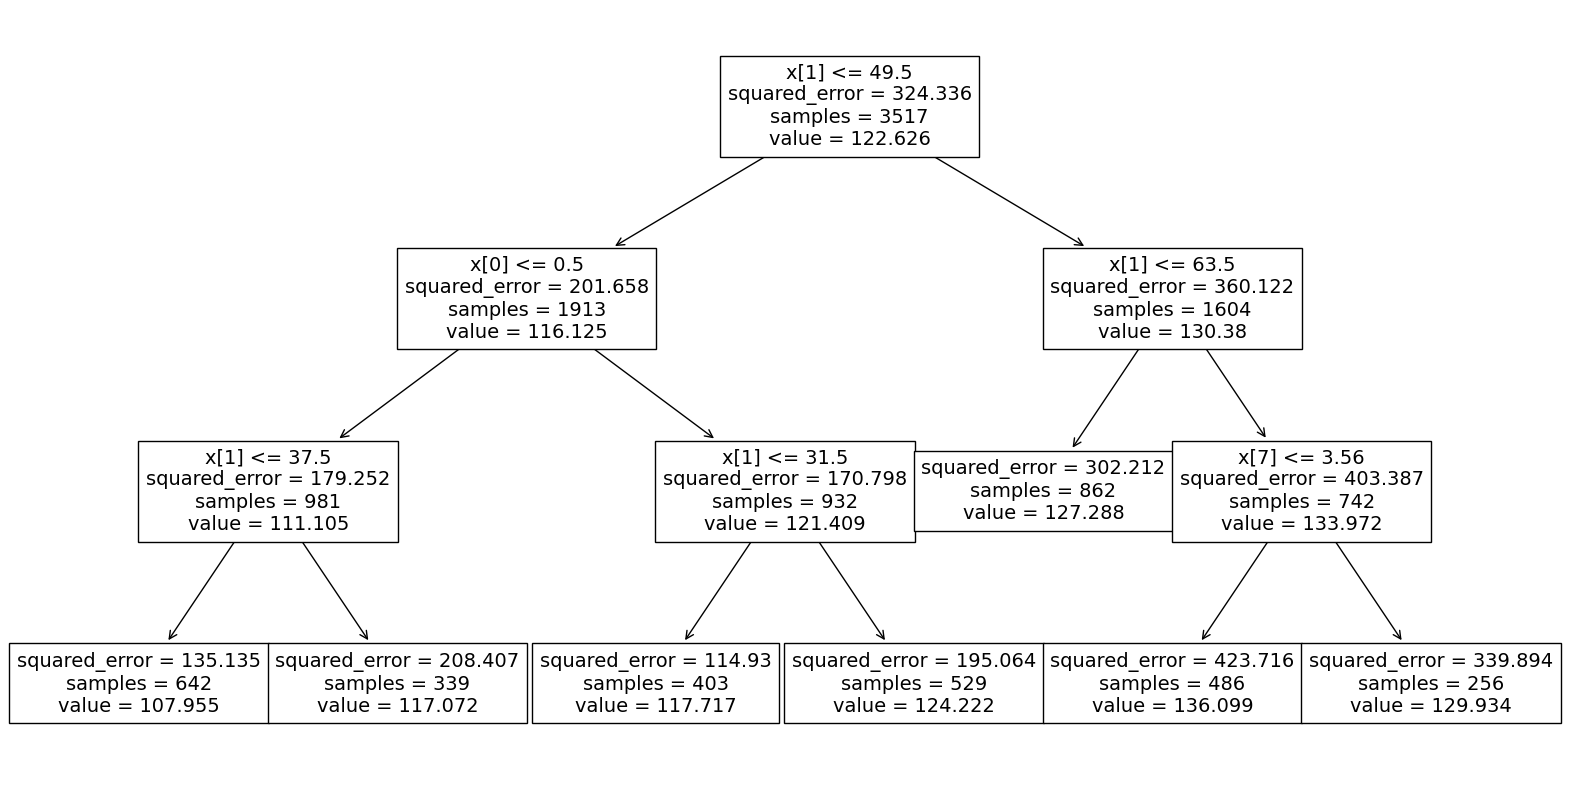

In [57]:
# Use chosen tree model to do regression and plot them
tree1 = DecisionTreeRegressor(random_state = 0, max_leaf_nodes = 7)
tree1.fit(X_train, y_train_h)
plt.figure(figsize=(20,10))
tree.plot_tree(tree1)
plt.show()

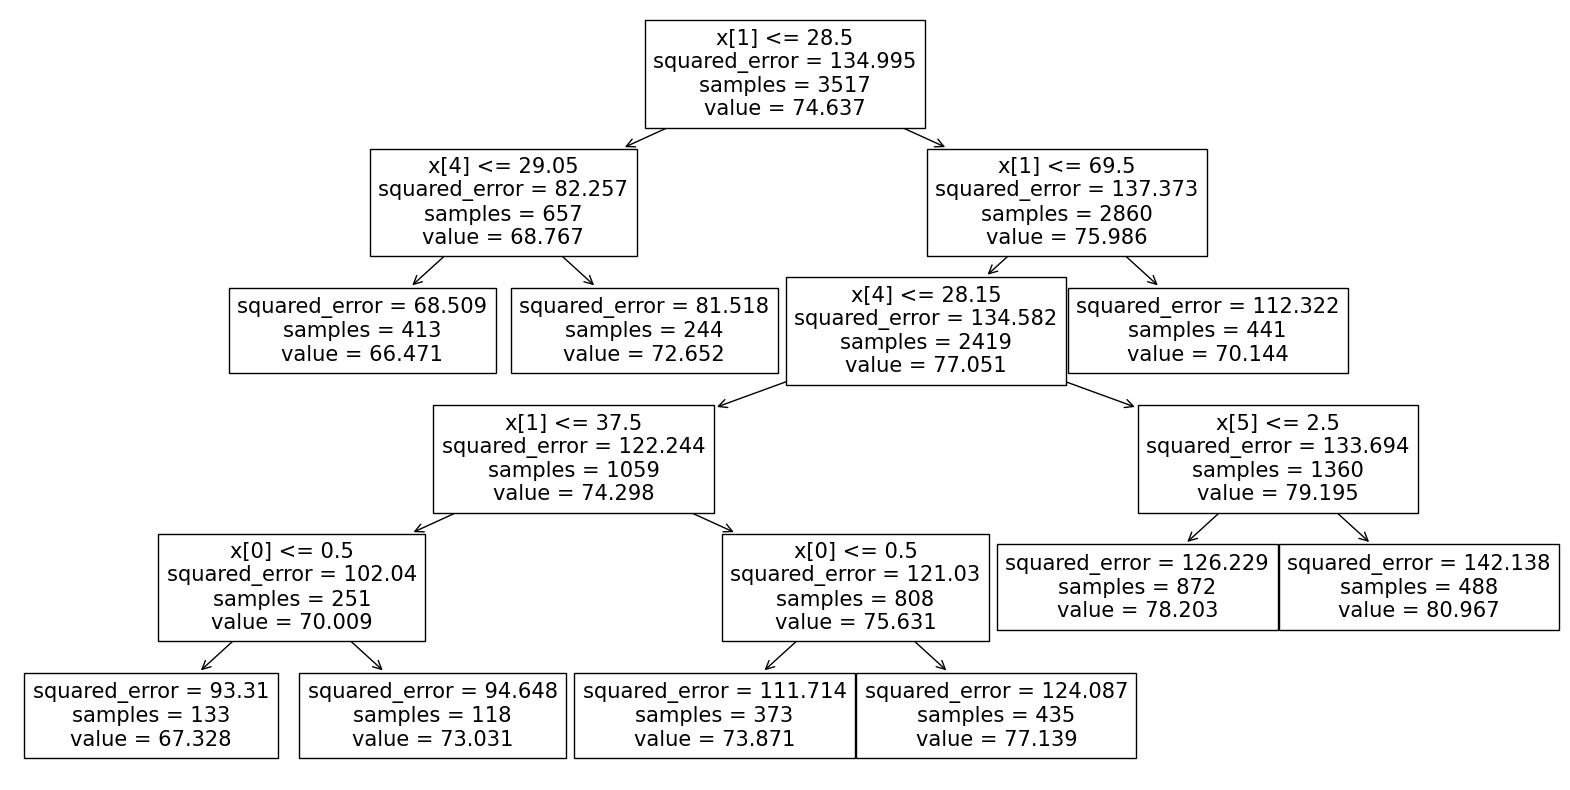

In [58]:
tree2 = DecisionTreeRegressor(random_state = 0, max_leaf_nodes = 9)
tree2.fit(X_train, y_train_l)
plt.figure(figsize=(20,10))
tree.plot_tree(tree2)
plt.show()

In [59]:
# Do prediction on test data and calculate R^2 to evaluate the model
y_pred_h = tree1.predict(X_test)
y_pred_l = tree2.predict(X_test)

# calculate R^2
r2_h = r2_score(y_test_h, y_pred_h)
r2_l = r2_score(y_test_l, y_pred_l)
print(f"Single Tree: R^2 for BPXOSY: {r2_h},\nSingle Tree: R^2 for BPXODI: {r2_l}")

Single Tree: R^2 for BPXOSY: 0.21431685073800488,
Single Tree: R^2 for BPXODI: 0.12181383756986719


Basically, the $R^2$ is relatively low for the tree prediction. One reason is that we choose too few leaves in the tree model considering such a large and variant dataset. Another reason is that single tree is not comprehensive and complicated enough to do good prediction. Thus next we use random forest to fit the data.

### Random Forest

#### Regression for BPXOSY

In [60]:
# select max_depth by cross_validation
depths = np.arange(1,11,1)
for depth in depths:
    rf1 = RandomForestRegressor(random_state = 0, n_estimators = 1000, max_depth = depth, max_features = "sqrt")
    results = pd.DataFrame(cross_validate(rf1,X_train,y_train_h,cv=cv,scoring='neg_mean_squared_error'))
    print(f"max_depth = {depth}, average MSE = {-results.test_score.mean()}")

max_depth = 1, average MSE = 295.24182917366977
max_depth = 2, average MSE = 277.4746566385099
max_depth = 3, average MSE = 265.6726089414266
max_depth = 4, average MSE = 257.59709691066064
max_depth = 5, average MSE = 252.51571832127985
max_depth = 6, average MSE = 249.3849069862942
max_depth = 7, average MSE = 247.45030489411928
max_depth = 8, average MSE = 246.77662567378496
max_depth = 9, average MSE = 247.18846780132043
max_depth = 10, average MSE = 248.23252205531122


From results above, we choose max_depth = 8 which has minimum average MSE.

#### Regression for BPXODI

In [61]:
# select max_depth by cross_validation
depths = np.arange(1,11,1)
for depth in depths:
    rf2 = RandomForestRegressor(random_state = 0, n_estimators = 1000, max_depth = depth, max_features = "sqrt")
    results = pd.DataFrame(cross_validate(rf2,X_train,y_train_l,cv=cv,scoring='neg_mean_squared_error'))
    print(f"max_depth = {depth}, average MSE = {-results.test_score.mean()}")

max_depth = 1, average MSE = 128.23518688946734
max_depth = 2, average MSE = 122.92481306527475
max_depth = 3, average MSE = 118.98574076870982
max_depth = 4, average MSE = 115.9586616863487
max_depth = 5, average MSE = 113.95666319402953
max_depth = 6, average MSE = 112.69919899710712
max_depth = 7, average MSE = 111.93822370247676
max_depth = 8, average MSE = 111.54629035202383
max_depth = 9, average MSE = 111.59579252363149
max_depth = 10, average MSE = 111.89080182508943


From results above, we choose max_depth = 8 which has minimum average MSE.

In [62]:
# fit a random forest
rf1 = RandomForestRegressor(random_state = 0, n_estimators = 1000, max_depth = 8, max_features = "sqrt")
rf2 = RandomForestRegressor(random_state = 0, n_estimators = 1000, max_depth = 8, max_features = "sqrt")
rf1.fit(X_train, y_train_h)
rf2.fit(X_train, y_train_l)

# Do prediction on test data and calculate R^2 to evaluate the model
y_pred_h = rf1.predict(X_test)
y_pred_l = rf2.predict(X_test)

# calculate R^2
r2_h = r2_score(y_test_h, y_pred_h)
r2_l = r2_score(y_test_l, y_pred_l)
print(f"Random Forest: R^2 for BPXOSY: {r2_h},\nRandom Forest: R^2 for BPXODI: {r2_l}")

Random Forest: R^2 for BPXOSY: 0.24413707562862563,
Random Forest: R^2 for BPXODI: 0.14485617530308936


### Feature importance plot

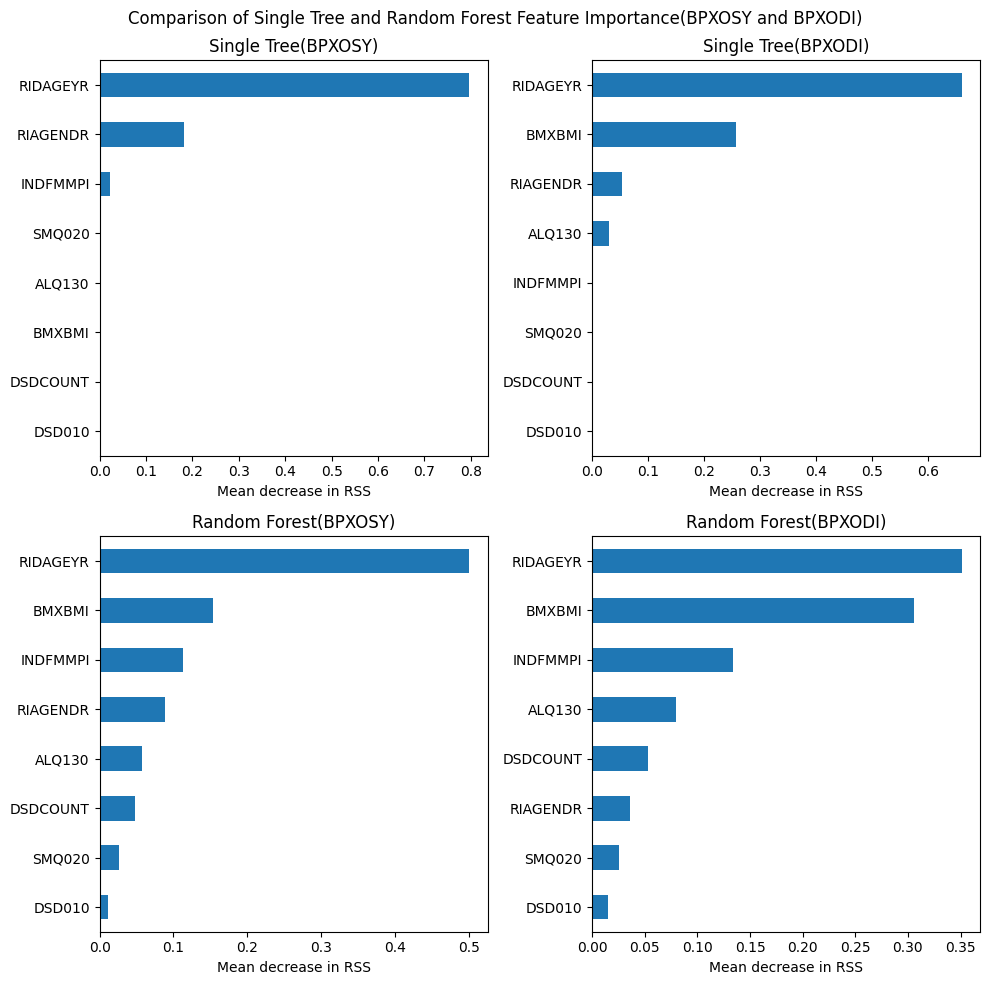

In [63]:
# do feature importance plot
importances_tree1 = tree1.feature_importances_
tree_importances1 = pd.Series(importances_tree1, index = tree1.feature_names_in_)
importances_tree2 = tree2.feature_importances_
tree_importances2 = pd.Series(importances_tree2, index = tree2.feature_names_in_)
importances_rf1 = rf1.feature_importances_
forest_importances1 = pd.Series(importances_rf1, index = rf1.feature_names_in_)
importances_rf2 = rf2.feature_importances_
forest_importances2 = pd.Series(importances_rf2, index = rf2.feature_names_in_)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Comparison of Single Tree and Random Forest Feature Importance(BPXOSY and BPXODI)')

tree_importances1.sort_values(ascending = True).plot.barh(ax = ax1)
ax1.set_title("Single Tree(BPXOSY)")
ax1.set(xlabel = "Mean decrease in RSS")

tree_importances2.sort_values(ascending = True).plot.barh(ax = ax2)
ax2.set_title("Single Tree(BPXODI)")
ax2.set(xlabel = "Mean decrease in RSS")

forest_importances1.sort_values(ascending = True).plot.barh(ax = ax3)
ax3.set_title("Random Forest(BPXOSY)")
ax3.set(xlabel = "Mean decrease in RSS")

forest_importances2.sort_values(ascending = True).plot.barh(ax = ax4)
ax4.set_title("Random Forest(BPXODI)")
ax4.set(xlabel = "Mean decrease in RSS")

plt.tight_layout()
plt.savefig("feature importance plot")

The results of random forest only improve the $R^2$ score a little. This might imply that the single tree method or parallel aggregation methods such as random forest are not suitable for regression on this dataset. Therefore next we consider a sequential method: Boosting method

### Boosting

#### BPXOSY

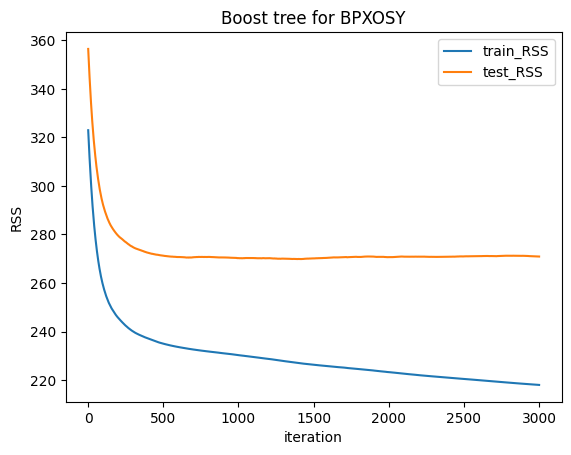

In [64]:
M = 3000
train_RSS_h = np.zeros(M)
test_RSS_h = np.zeros(M)
# fit the boosting model
boost = HistGradientBoostingRegressor(random_state = 0, learning_rate = 0.01, max_iter = M, max_depth = 2)
boost.fit(X_train, y_train_h)

# predict the error at each iteration
for i, train_pred in enumerate(boost.staged_predict(X_train)):
    train_RSS_h[i] = np.mean((train_pred-y_train_h)**2)
    
for i, test_pred in enumerate(boost.staged_predict(X_test)):
    test_RSS_h[i] = np.mean((test_pred-y_test_h)**2)
    
plt.plot(np.arange(M)+1, train_RSS_h, label = "train_RSS")
plt.plot(np.arange(M)+1, test_RSS_h, label = "test_RSS")
plt.title("Boost tree for BPXOSY")
plt.xlabel("iteration")
plt.ylabel("RSS")
plt.legend()
plt.show()

In [65]:
np.argmin(test_RSS_h)+1, min(test_RSS_h)

(1414, 269.86005487774185)

#### BPXODI

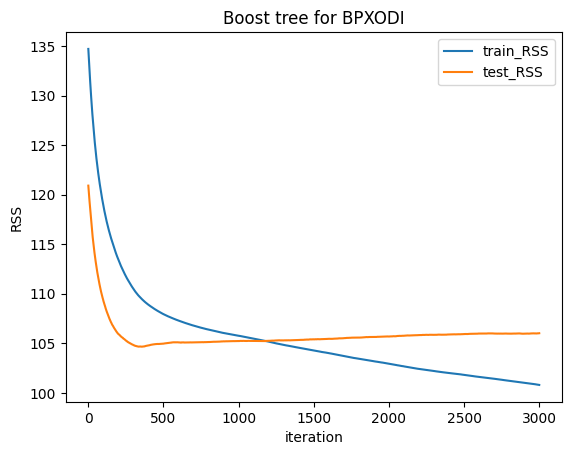

In [66]:
M = 3000
train_RSS_l = np.zeros(M)
test_RSS_l = np.zeros(M)
# fit the boosting model
boost = HistGradientBoostingRegressor(random_state = 0, learning_rate = 0.01, max_iter = M, max_depth = 2)
boost.fit(X_train, y_train_l)

# predict the error at each iteration
for i, train_pred in enumerate(boost.staged_predict(X_train)):
    train_RSS_l[i] = np.mean((train_pred-y_train_l)**2)
    
for i, test_pred in enumerate(boost.staged_predict(X_test)):
    test_RSS_l[i] = np.mean((test_pred-y_test_l)**2)
    
plt.plot(np.arange(M)+1, train_RSS_l, label = "train_RSS")
plt.plot(np.arange(M)+1, test_RSS_l, label = "test_RSS")
plt.title("Boost tree for BPXODI")
plt.xlabel("iteration")
plt.ylabel("RSS")
plt.legend()
plt.show()

In [67]:
np.argmin(test_RSS_l)+1, min(test_RSS_l)

(354, 104.65870389044404)

In [68]:
# fit a random forest
gb1 = HistGradientBoostingRegressor(random_state = 0, learning_rate = 0.01, max_iter = 1414, max_depth = 2)
gb2 = HistGradientBoostingRegressor(random_state = 0, learning_rate = 0.01, max_iter = 354, max_depth = 2)
gb1.fit(X_train, y_train_h)
gb2.fit(X_train, y_train_l)

# Do prediction on test data and calculate R^2 to evaluate the model
y_pred_h = gb1.predict(X_test)
y_pred_l = gb2.predict(X_test)

# calculate R^2
r2_h = r2_score(y_test_h, y_pred_h)
r2_l = r2_score(y_test_l, y_pred_l)
print(f"Gradient Boosting Tree: R^2 for BPXOSY: {r2_h},\nGradient Boosting Tree: R^2 for BPXODI: {r2_l}")

Gradient Boosting Tree: R^2 for BPXOSY: 0.24570574420770308,
Gradient Boosting Tree: R^2 for BPXODI: 0.13570806219331133


## Linear and Polynomial Regression

### Polynomial Regression

In [69]:
# split into train and test datasets
data_train, data_test = train_test_split(data, test_size = 0.2, random_state = 6789, stratify = data[["HYPER"]])

# extract train/test X and y
X_train = data_train.drop(["BPXOSY","BPXODI","HYPER"], axis = 1)
y_train_h = data_train.BPXOSY
y_train_l = data_train.BPXODI
X_test = data_test.drop(["BPXOSY","BPXODI","HYPER"], axis = 1)
y_test_h = data_test.BPXOSY
y_test_l = data_test.BPXODI

#### BPXOSY

In [70]:
import pandas as pd
import sklearn.metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

cv = KFold(n_splits = 5, random_state = 3, shuffle = True)
MSE = np.zeros(4)

for degree in range(1,5):
    model = LinearRegression()
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_train)
    results = pd.DataFrame(cross_validate(model,X_poly,y_train_h,cv=cv,scoring="neg_mean_squared_error",return_train_score=True))
    results["test_score"] = -results["test_score"]
    results["train_score"] = -results["train_score"]
    print(f"degree = {degree} results: \n", results, "\n")
    MSE[degree-1] = results["test_score"].mean()
    print(f"degree = {degree} average MSE: \n", MSE[degree-1], "\n")

degree = 1 results: 
    fit_time  score_time  test_score  train_score
0  0.020360    0.000464  234.565475   248.591621
1  0.002177    0.000843  244.528384   245.853104
2  0.002409    0.000787  230.074589   249.589581
3  0.001274    0.000342  251.669354   244.280149
4  0.000746    0.000287  276.855611   237.831044 

degree = 1 average MSE: 
 247.53868260627002 

degree = 2 results: 
    fit_time  score_time  test_score  train_score
0  0.026386    0.000964  228.521392   238.942803
1  0.005827    0.000767  242.188280   235.310988
2  0.002647    0.000346  225.585090   239.684358
3  0.002229    0.000380  249.986157   233.891663
4  0.002217    0.000300  271.945067   228.285113 

degree = 2 average MSE: 
 243.64519722569804 

degree = 3 results: 
    fit_time  score_time  test_score  train_score
0  0.035820    0.000514  242.820011   228.308012
1  0.022256    0.001045  248.778415   226.200814
2  0.023322    0.004836  235.882047   228.766617
3  0.025380    0.001259  257.666370   224.807394
4  

choose polynomial regression degree = 2

In [71]:
lmodel1 = LinearRegression()
lmodel1.fit(X_train, y_train_h)

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_train)
pmodel1 = LinearRegression()
pmodel1.fit(X_poly, y_train_h)

yl_pred_h = lmodel1.predict(X_test)
X_poly_test = poly.fit_transform(X_test)
yp_pred_h = pmodel1.predict(X_poly_test)

# calculate MSE
MSE_h_l = np.mean((y_test_h - yl_pred_h)**2)
MSE_h_p = np.mean((y_test_h - yp_pred_h)**2)
print(f"Linear Regression: MSE for BPXOSY: {MSE_h_l},\nPolynomial Regression: MSE for BPXOSY: {MSE_h_p}")

# calculate R^2
r2_h_l = r2_score(y_test_h, yl_pred_h)
r2_h_p = r2_score(y_test_h, yp_pred_h)
print(f"Linear Regression: R^2 for BPXOSY: {r2_h_l},\nPolynomial Regression: R^2 for BPXOSY: {r2_h_p}")

Linear Regression: MSE for BPXOSY: 276.896075193532,
Polynomial Regression: MSE for BPXOSY: 270.53739213869716
Linear Regression: R^2 for BPXOSY: 0.22603914438342465,
Polynomial Regression: R^2 for BPXOSY: 0.24381249770479219


#### BPXODI

In [72]:
cv = KFold(n_splits = 5, random_state = 3, shuffle = True)
MSE = np.zeros(4)

for degree in range(1,5):
    model = LinearRegression()
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_train)
    results = pd.DataFrame(cross_validate(model,X_poly,y_train_l,cv=cv,scoring="neg_mean_squared_error",return_train_score=True))
    results["test_score"] = -results["test_score"]
    results["train_score"] = -results["train_score"]
    print(f"degree = {degree} results: \n", results, "\n")
    MSE[degree-1] = results["test_score"].mean()
    print(f"degree = {degree} average MSE: \n", MSE[degree-1], "\n")

degree = 1 results: 
    fit_time  score_time  test_score  train_score
0  0.002613    0.000811  128.752823   122.217875
1  0.000810    0.000293  130.217375   121.688773
2  0.000695    0.000300  110.690244   126.593505
3  0.001189    0.000901  127.790744   122.367795
4  0.001822    0.000760  123.921047   123.363296 

degree = 1 average MSE: 
 124.274446602645 

degree = 2 results: 
    fit_time  score_time  test_score  train_score
0  0.002714    0.000318  114.924670   108.257001
1  0.002460    0.000298  117.693376   107.450588
2  0.004057    0.005653  101.002141   111.759625
3  0.002465    0.000315  114.362060   108.388438
4  0.002180    0.000316  113.873352   108.575003 

degree = 2 average MSE: 
 112.37111986700572 

degree = 3 results: 
    fit_time  score_time  test_score  train_score
0  0.024377    0.001238  116.764201   103.967139
1  0.021858    0.000395  122.018448   103.193016
2  0.013633    0.000369  105.210609   106.670578
3  0.013586    0.000439  114.927308   104.055160
4  0.

choose polynomial regression degree = 2

In [73]:
lmodel2 = LinearRegression()
lmodel2.fit(X_train, y_train_l)

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_train)
pmodel2 = LinearRegression()
pmodel2.fit(X_poly, y_train_l)

yl_pred_l = lmodel2.predict(X_test)
X_poly_test = poly.fit_transform(X_test)
yp_pred_l = pmodel2.predict(X_poly_test)

# calculate MSE
MSE_l_l = np.mean((y_test_l - yl_pred_l)**2)
MSE_l_p = np.mean((y_test_l - yp_pred_l)**2)
print(f"Linear Regression: MSE for BPXODI: {MSE_l_l},\nPolynomial Regression: MSE for BPXODI: {MSE_l_p}")

# calculate R^2
r2_l_l = r2_score(y_test_l, yl_pred_l)
r2_l_p = r2_score(y_test_l, yp_pred_l)
print(f"Linear Regression: R^2 for BPXODI: {r2_l_l},\nPolynomial Regression: R^2 for BPXODI: {r2_l_p}")

Linear Regression: MSE for BPXODI: 112.23089623871883,
Polynomial Regression: MSE for BPXODI: 105.01954212103139
Linear Regression: R^2 for BPXODI: 0.07317542463087578,
Polynomial Regression: R^2 for BPXODI: 0.13272818988497903


## GAM

### BPXOSY

In [74]:
# fit the model
gam1 = LinearGAM(f(0) + s(1) + f(2) + s(3) + s(4) + s(5) + f(6) + s(7))
gam1.fit(X_train, y_train_h)

# # search the best lams
# lam = 0.01
# lams = [lam] * 8
# gam.gridsearch(X_train, y_train_h, lam=lams)

# # report the best lambda
# print(f'Optimal lambda: {gam.lam}')

gam1.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     66.8462
Link Function:                     IdentityLink Log Likelihood:                                -22592.8796
Number of Samples:                         3517 AIC:                                            45321.4516
                                                AICc:                                           45324.1608
                                                GCV:                                              254.0978
                                                Scale:                                            245.4196
                                                Pseudo R-Squared:                                   0.2577
Feature Function                  Lam

/tmp/ipykernel_131/2585642804.py:13: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam1.summary()


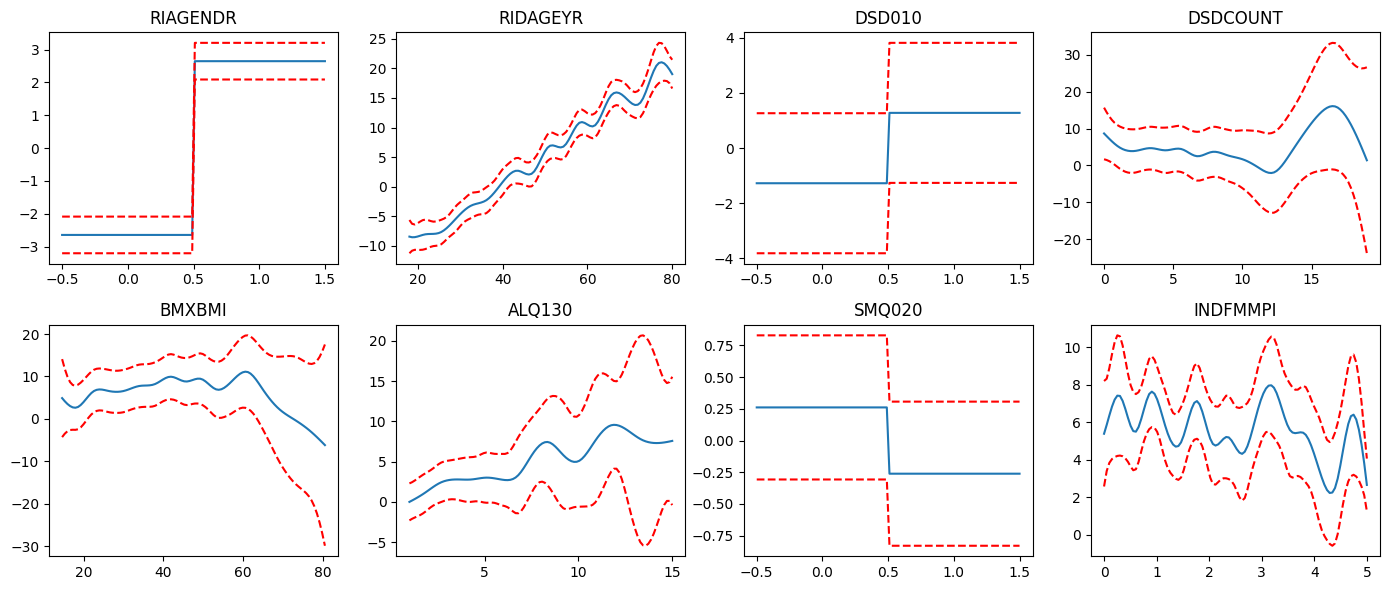

In [75]:
# plotting
fig, (axs1,axs2) = plt.subplots(2, 4, figsize=(14, 6))
titles = ["RIAGENDR", "RIDAGEYR", "DSD010", "DSDCOUNT", "BMXBMI", "ALQ130", "SMQ020", "INDFMMPI"]
for i, ax in enumerate(axs1):
    # create a nice grid of X data
    XX = gam1.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam1.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam1.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i])
    
for j, ax in enumerate(axs2):
    # create a nice grid of X data
    XX = gam1.generate_X_grid(term=j+4)
    ax.plot(XX[:, j+4], gam1.partial_dependence(term=j+4, X=XX))
    ax.plot(XX[:, j+4], gam1.partial_dependence(term=j+4, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[j+4])

plt.tight_layout()
plt.savefig("partial dependence h")

### BPXODI

In [80]:
# fit the model
gam2 = LinearGAM(f(0) + s(1) + f(2) + s(3) + s(4) + s(5) + f(6) + s(7))
gam2.fit(X_train, y_train_l)

# # search the best lams
# lam = 0.01
# lams = [lam] * 8
# gam.gridsearch(X_train, y_train_h, lam=lams)

# # report the best lambda
# print(f'Optimal lambda: {gam.lam}')

gam2.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     66.8462
Link Function:                     IdentityLink Log Likelihood:                                -19794.7081
Number of Samples:                         3517 AIC:                                            39725.1087
                                                AICc:                                            39727.818
                                                GCV:                                              114.3959
                                                Scale:                                             110.489
                                                Pseudo R-Squared:                                   0.1971
Feature Function                  Lam

/tmp/ipykernel_131/3154858058.py:13: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam2.summary()


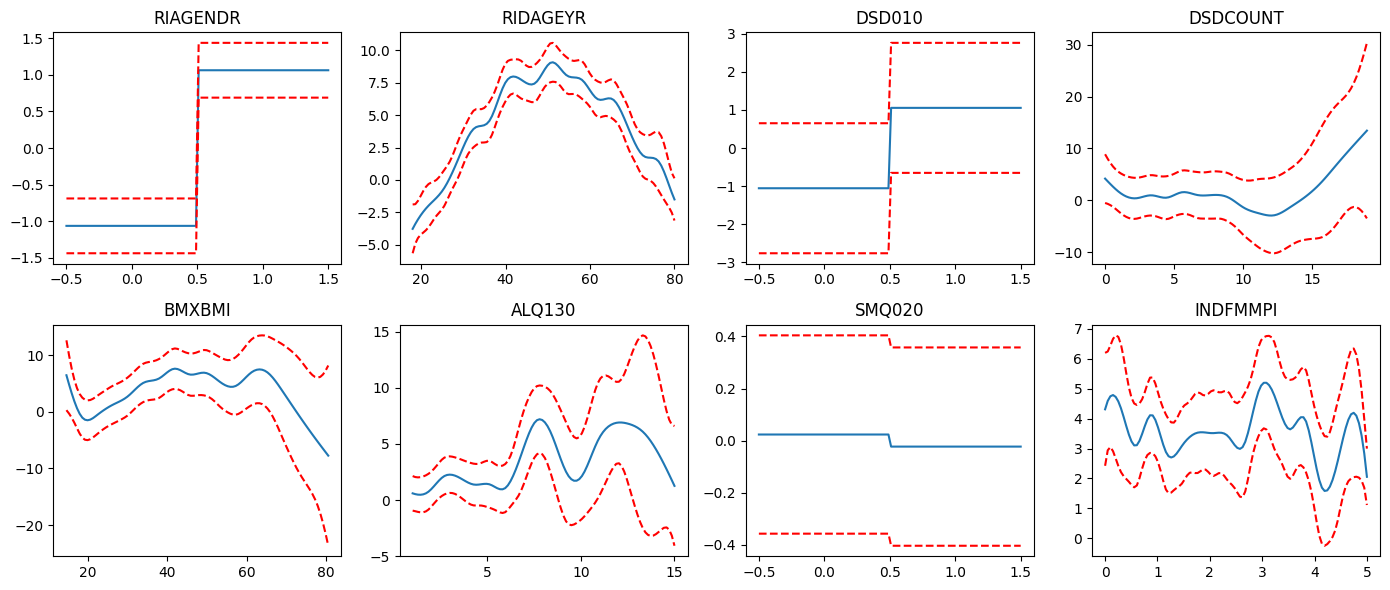

In [77]:
# plotting
fig, (axs1,axs2) = plt.subplots(2, 4, figsize=(14, 6))
titles = ["RIAGENDR", "RIDAGEYR", "DSD010", "DSDCOUNT", "BMXBMI", "ALQ130", "SMQ020", "INDFMMPI"]
for i, ax in enumerate(axs1):
    # create a nice grid of X data
    XX = gam2.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam2.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam2.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[i])
    
for j, ax in enumerate(axs2):
    # create a nice grid of X data
    XX = gam2.generate_X_grid(term=j+4)
    ax.plot(XX[:, j+4], gam2.partial_dependence(term=j+4, X=XX))
    ax.plot(XX[:, j+4], gam2.partial_dependence(term=j+4, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(titles[j+4])

plt.tight_layout()
plt.savefig("partial dependence l")

In [84]:
y_pred_h = gam1.predict(X_test)
mse_h =np.mean((y_pred_h - y_test_h)**2)
R2_h = r2_score(y_test_h, y_pred_h)

y_pred_l = gam2.predict(X_test)
mse_l = np.mean((y_pred_l - y_test_l)**2)
R2_l = r2_score(y_test_l, y_pred_l)
print(f'mse for BPXOSY: {mse_h}, R2 for BPXOSY: {R2_h}')
print(f'mse for BPXODI: {mse_l}, R2 for BPXODI: {R2_l}')

mse for BPXOSY: 278.27651994367073, R2 for BPXOSY: 0.22218062020895935
mse for BPXODI: 106.86705129103453, R2 for BPXODI: 0.1174710997309758
